# Profilers
Profilers help to identify performance problems. These are tools designed to give the metrics to find the slowest parts of the code so that we can optimize what really matters. Profilers can gather a wide variety of metrics: wall time, CPU time, network or memory consumption, I/O operations, etc.
<br>
Profilers can answer questions like,
- How many times is each method in my code called? 
- How long does each of these methods take?
- How much memory does the method consume?

<br>
There are different types of profilers

- **Deterministic Profiling:** Deterministic profilers execute trace functions at various points of interest (function call, function return) and record precise timings of these events. It means the code runs slower under profiling. Its use in production systems is often impractical.


- **Statistical profiling:**  Instead of tracking every event (call to every function), statistical profilers interrupt applications periodically and collect samples of the execution state (call stack snapshots). The call stacks are then analyzed to determine the execution time of different parts of the application. This method is less accurate, but it also reduces the overhead.

<br>

We will begin profiling with a Starter Kit:
- **Scikit-Learn Intelligent Indexing for Incoming Correspondence – [LINK](https://github.com/oneapi-src/intelligent-indexing)**

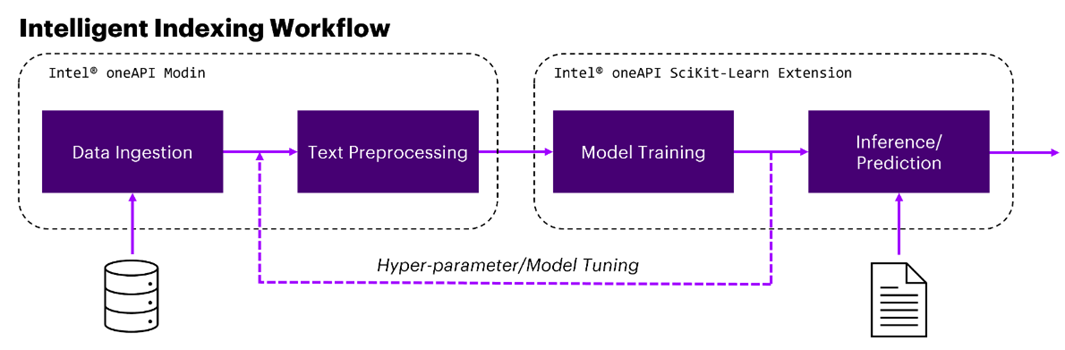

Follow the steps mentioned in the [github link](https://github.com/oneapi-src/intelligent-indexing) to setup the environment.
The process involves
- Setting up a virtual environment for stock/Intel®-accelerated ML
- Preprocessing data using Pandas/Intel® oneAPI Modin and NLTK
- Training an NLP model for text classification using scikit-learn/Intel® oneAPI scikit-learn extension
- Predicting from the trained model on new data using scikit-learn/Intel® oneAPI scikit-learn extension.

Here we'll discuss profiling Tools Available for Python
- [Vtune](https://www.intel.com/content/www/us/en/developer/tools/oneapi/vtune-profiler.html)
- [Cprofile (function profiler)](https://docs.python.org/3/library/profile.html) 
- [Profile (function profiler)](https://docs.python.org/3/library/profile.html)
- [line_profiler (line profiler)](https://github.com/pyutils/line_profiler)
- [memory_profiler (line)](https://github.com/pythonprofilers/memory_profiler)
- [Scalene (both line and function profiler)](https://github.com/plasma-umass/scalene)
- [Function-Trace (function profiler)](https://functiontrace.com/)

%lprun: Run code with the line-by-line profiler <br>
%memit: Measure the memory use of a single statement <br>
%mprun: Run code with the line-by-line memory profiler <br>

# Stock

## Profile (Function Profiler)

**1. %prun**: Use this magic command to profile  single line of code.
For example ->
```
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total
```
To profile this specific function use <br>
**%prun sum_of_lists(1000000)** <br>
If you want to know more about this magic command visit this [link](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-prun) <br>

**2. %run**: Use this magic command to profile the python script.
The different flags used below are <br>
- **-p**: run program under the control of the Python profiler module (which prints a detailed report of execution times, function calls, etc) <br>
- **-r**: return the pstats.Stats object generated by the profiling. This object has all the information about the profile in it, and you can later use it for further analysis or in other functions. <br>
- **-s**: sort profile by given key. You can provide more than one key by using the option several times: ‘-s key1 -s key2 -s key3…’. The default sorting key is ‘cummulative time’. <br>
- **-D**: save (via dump_stats) profile statistics to given filename. This data is in a format understood by the pstats module. <br>
If you want to know more about this magic command visit this [link](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-run)

In [ ]:
%run -p -r -s cumulative -D /ws2/yfulwani/intelligent-indexing/cprofile_results/stock_results/prun_stock.prof /ws2/yfulwani/intelligent-indexing/src/run_benchmarks.py -l /ws2/yfulwani/intelligent-indexing/logs/stock_stock.log

[nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /ws2/yfulwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**To visualize the results use Snakeviz** <br>
- **-h**: show this help message and exit <br>
- **-v**: show program's version number and exit <br>
- **-H**: hostname to bind to (default: 127.0.0.1) <br>
- **-p**: port to bind to; port will be selected automatically (default: 8080) <br>
- **-b**: name of webbrowser to launch as described in the [documentation](https://docs.python.org/3/library/webbrowser.html) <br>
- **-s**: start SnakeViz in server-only mode--no attempt will be made to open a browser <br>

**To know more about Snakeviz visit this [documentation](https://jiffyclub.github.io/snakeviz/)** <br>
Use the below command on the CLI terminal to visualize the saved results

In [5]:
#snakeviz '/ws2/yfulwani/intelligent-indexing/cprofile_results/stock_results/prun_stock.prof'

**Interpreting Results** <br>
SnakeViz has two visualization styles, **icicle** (the default) and **sunburst**. In both the fraction of time spent in a function is represented by the extent of a visualization element, either the width of a rectangle or the angular extent of an arc. You can switch between the two styles using the “Style” dropdown. (See more below under Controls.)

Functions don’t only spend time calling other functions, they also have their own internal time. SnakeViz shows this by putting a special child on each node that represents internal time. Only functions that call other functions will have this, functions with no calls are entirely internal time.

- **Icicle** <br>
In the icicle visualization style functions are represented by rectangles. A root function is the top-most rectangle, with its child functions it calls below it, then the functions those call below them, and so on. The amount of time spent inside a function is represented by the width of the rectangle. A rectangle that stretches across most of the visualization represents a function that is taking up most of the time of its calling function, while a skinny rectangle represents a function that is using hardly any time at all.
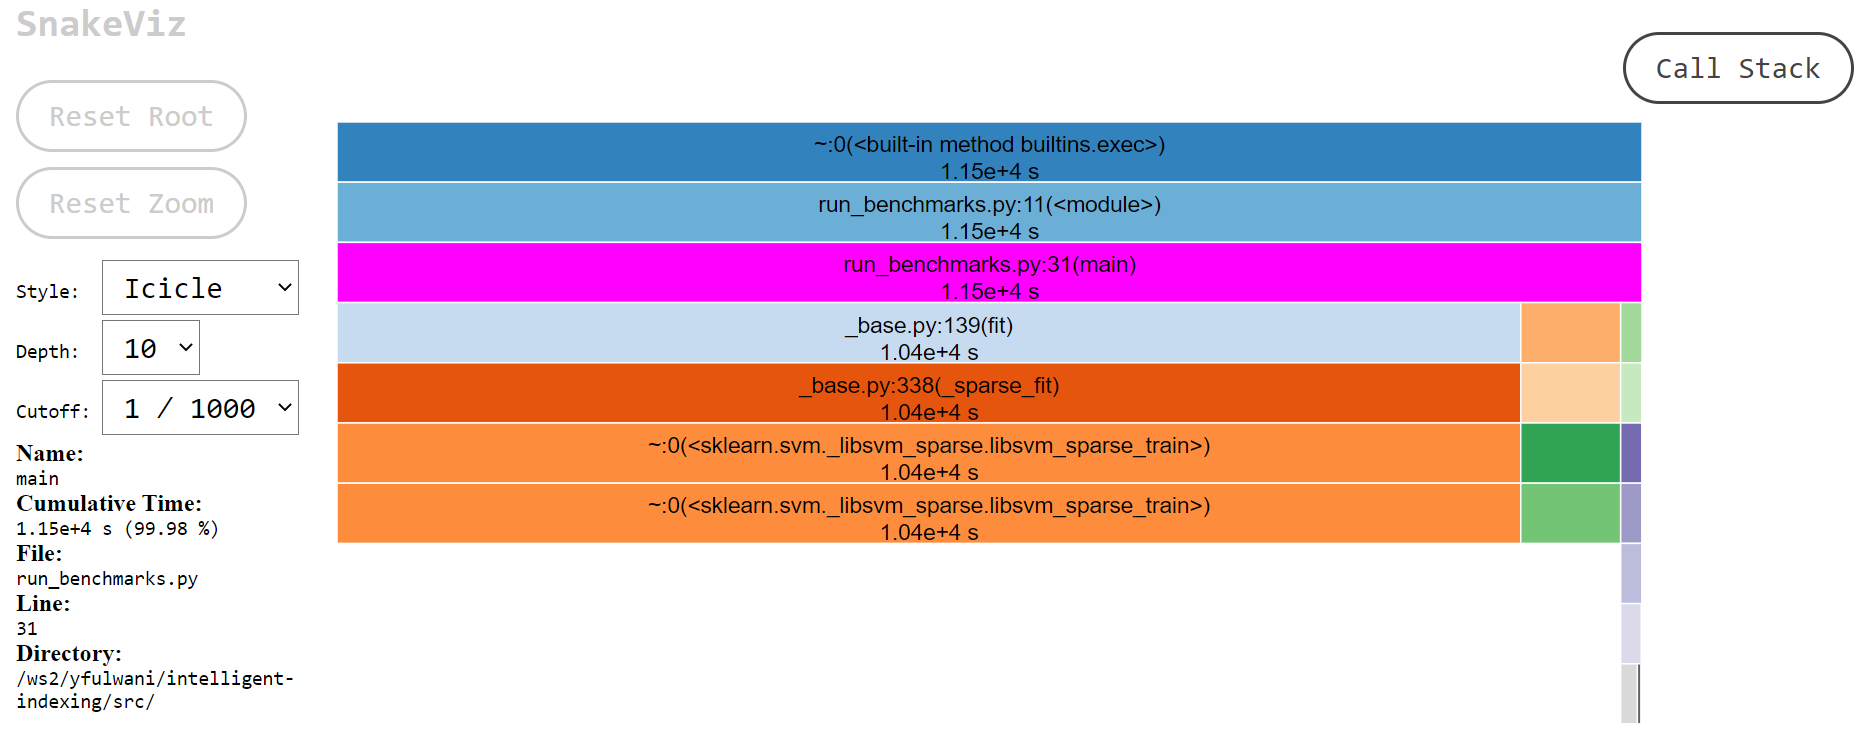 <br>

- **Sunburst** <br>
In the sunburst visualization style functions are represented as arcs. A root function is a circle at the middle, with functions it calls around, then the functions those functions call, and so on. The amount of time spent inside a function is represented by the angular extent of the arc (how far around the circle it goes). An arc that wraps most of the way around the circle represents a function that is taking up most of the time of its calling function, while a skinny arc represents a function that is using hardly any time at all.
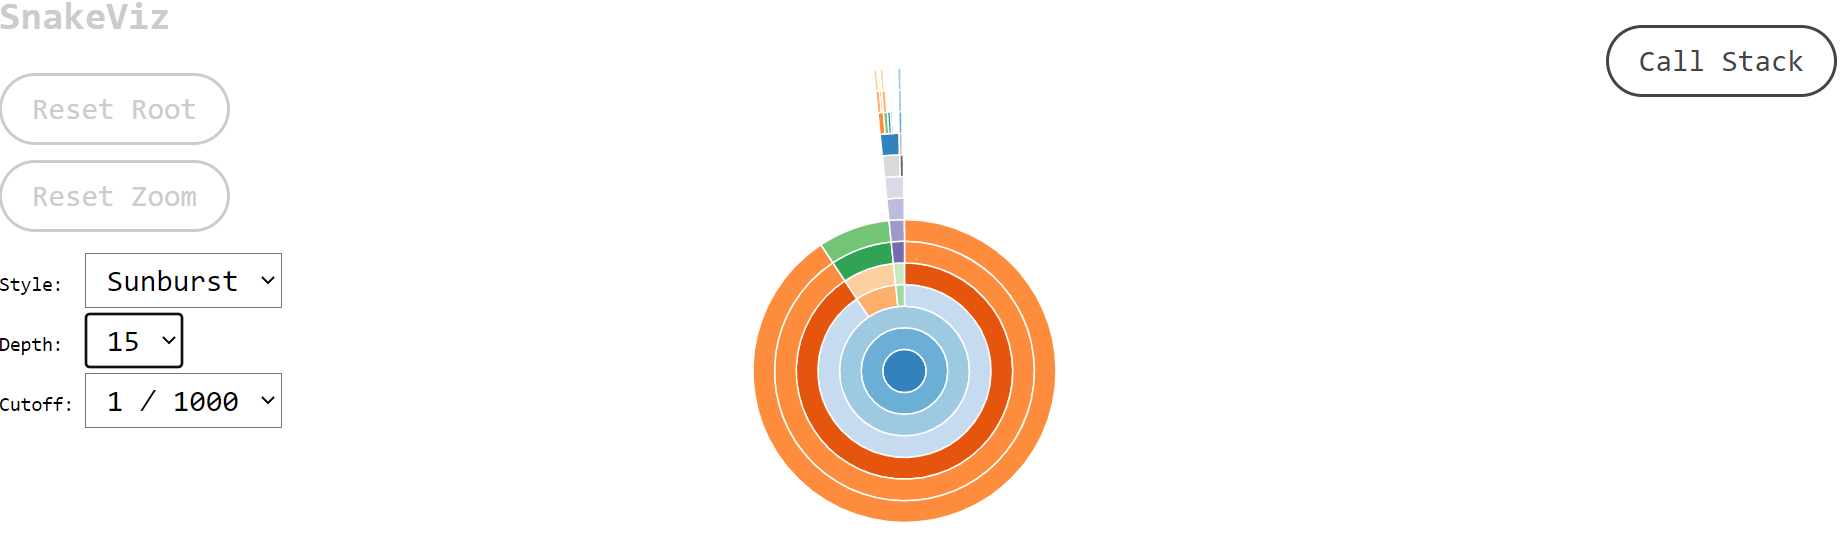 <br>

The displayed information includes:

- **Name**: function name
- **Cumulative Time**: total cumulative amount of time spent in the function in seconds and as a percentage of the total program run time
- **File**: name of the file in which the function is defined
- **Line**: line number on which the function is defined
- **Directory**: directory of the file

To know more about Snakeviz visit this [link](https://jiffyclub.github.io/snakeviz/) <br>

## Line Profiler

Function profiling tools only time function calls. This is a good first step for locating hotspots in one's program and is frequently all one needs to do to optimize the program. **However, sometimes the cause of the hotspot is actually a single line in the function, and that line may not be obvious from just reading the source code**. These cases are particularly frequent in scientific computing. Functions tend to be larger (sometimes because of legitimate algorithmic complexity, sometimes because the programmer is still trying to write FORTRAN code), and a single statement without function calls can trigger lots of computation when using libraries like numpy. cProfile only times explicit function calls, not special methods called because of syntax. Consequently, a relatively slow numpy operation on large arrays like this,
```
a[large_index_array] = some_other_large_array
```
is a hotspot that never gets broken out by cProfile because there is no explicit function call in that statement.

***LineProfiler can be given functions to profile, and it will time the execution of each individual line inside those functions.*** <br>

To know more about line profiler visit [link](https://github.com/pyutils/line_profiler) <br>

Ways to Profile Python Code using "line_profiler"
- **kernprof**: Command Prompt/Shell Command: This command let us profile whole Python script from command line/shell.
- **LineProfiler**: Object in Python Script: This let us profile individual functions of our code by declaring profiler object in script itself.
- **%lprun**: Jupyter Notebook Magic Command: This let us profile functions in Jupyter Notebooks using "%lprun" line magic command.

### Example to use KernProf and Line_Profiler Object

Consider a python file **random_number_average.py** with following code
```
import time
import random

@profile
def very_slow_random_generator():
    time.sleep(5)
    arr = [random.randint(1,100) for i in range(100000)]
    return sum(arr) / len(arr)

@profile
def slow_random_generator():
    time.sleep(2)
    arr = [random.randint(1,100) for i in range(100000)]
    return sum(arr) / len(arr)
    
@profile
def main_func():
    result = slow_random_generator()
    print(result)

    result = very_slow_random_generator()
    print(result)

main_func()
```

#### KernProf

To Profile this file use decorators **@profile** above the function use 
```
!kernprof -l random_number_average.py
```

#### Line Profiler Object

We then need to create an object of LineProfiler class first. We then need to create a wrapper around main_func() by calling the LineProfiler instance passing it main_func. We can then execute that line profiler wrapper which will execute main_func().

```
from line_profiler import LineProfiler

lprofiler = LineProfiler()

lp_wrapper = lprofiler(main_func)

lp_wrapper()
```

### %lprun Usage

- Load Line Profiler using load_ext line_profiler
- lprun? : To get help for usage of lprun

In [6]:
%load_ext line_profiler

In [8]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:
%lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These statis

Create an object as shown below to pass parameters to the function

In [2]:
from run_benchmarks import main
C = type('C', (object,), {})
d = C()
d.intel = False
d.logfile = '/ws2/yfulwani/intelligent-indexing/logs/stock_stock.log'
d.preprocessing_only = False
d.save_model_dir = False

[nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /ws2/yfulwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
%lprun -T lprof0 -f main main(d) 


*** Profile printout saved to text file 'lprof0'. 


Timer unit: 1e-09 s

Total time: 11554.1 s
File: /ws2/yfulwani/intelligent-indexing/src/run_benchmarks.py
Function: main at line 32

Line #      Hits         Time  Per Hit   % Time  Line Contents
    32                                               """Setup model for inference and perform benchmarking
    33                                           
    34                                               Args:
    35                                                   flags: benchmarking flags
    36                                               """
    37                                           
    38                                               if flags.logfile == "":
    39         1       1766.0   1766.0      0.0          logging.basicConfig(level=logging.DEBUG)
    40                                               else:
    41                                                   logging.basicConfig(filename=flags.logfile, level=logging.DEBUG)
    42         1     242081.0 242081.0    

You can also save the profiling stats using flag **-D** as fname.prof and then use **snakeviz** to visualize the profiling results.

## Memory Profiler

# IPEX

In [1]:
%run -p -r -s cumulative -D /ws2/yfulwani/intelligent-indexing/cprofile_results/ipex_results/prun_ipex.prof /ws2/yfulwani/intelligent-indexing/src/run_benchmarks.py -i -l /ws2/yfulwani/intelligent-indexing/logs/intel_intel.log 

[nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /ws2/yfulwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(deploy_ray_func pid=1113653) 
(apply_list_of_funcs pid=1113633) [nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1113628) [nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1113628) [nltk_data]   Package punkt is already up-to-date!
(apply_list_of_funcs pid=1113628) [nltk_data] Downloading package stopwords to
(apply_list_of_funcs pid=1113628) [nltk_data]     /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1113628) [nltk_data]   Package stopwords is already up-to-date!
(apply_list_of_funcs pid=1113653) [nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1113653) [nltk_data]   Package punkt is alread

 
*** Profile stats marshalled to file '/ws2/yfulwani/intelligent-indexing/cprofile_results/ipex_results/prun_ipex.prof'. 


         11374116 function calls (11299176 primitive calls) in 110.190 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   2233/1    0.041    0.000  110.217  110.217 {built-in method builtins.exec}
        1    0.000    0.000  110.217  110.217 interactiveshell.py:2733(safe_execfile)
        1    0.000    0.000  110.217  110.217 py3compat.py:164(execfile)
        1    0.255    0.255  110.215  110.215 run_benchmarks.py:11(<module>)
        1    0.015    0.015  107.738  107.738 run_benchmarks.py:31(main)
        2    0.000    0.000   62.163   31.082 _device_offload.py:147(dispatch)
        1    0.000    0.000   40.937   40.937 svc.py:48(fit)
        1    0.000    0.000   40.934   40.934 svc.py:194(_onedal_fit)
        1    0.000    0.000   40.934   40.934 svm.py:393(fit)
        1    0.004    0.004   40.934   40.934 svm.py:180(_fit)
        1   40.019   40.019   40.019   40.019 {built-in method onedal._onedal_py_host.svm.clas

In [25]:
#snakeviz -p 8080 -s prun_ipex.prof

In [1]:
%load_ext line_profiler

In [4]:
from run_benchmarks import main

In [5]:
C = type('C', (object,), {})
d = C()
d.intel = True
d.logfile = '/ws2/yfulwani/intelligent-indexing/logs/intel_intel.log'
d.preprocessing_only = False
d.save_model_dir = False

In [6]:
print(d.intel)

True


In [7]:
%lprun -T lprof0 -f main main(d) 

(apply_list_of_funcs pid=1150067) [nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1150067) [nltk_data]   Package punkt is already up-to-date!
(apply_list_of_funcs pid=1150067) [nltk_data] Downloading package stopwords to
(apply_list_of_funcs pid=1150067) [nltk_data]     /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1150067) [nltk_data]   Package stopwords is already up-to-date!
(apply_list_of_funcs pid=1149982) [nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1149982) [nltk_data]   Package punkt is already up-to-date!
(apply_list_of_funcs pid=1149982) [nltk_data] Downloading package stopwords to
(apply_list_of_funcs pid=1149982) [nltk_data]     /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1149982) [nltk_data]   Package stopwords is already up-to-date!
(apply_list_of_funcs pid=1150063) [nltk_data] Downloading package punkt to /ws2/yfulwani/nltk_data...
(apply_list_of_funcs pid=1149985) 

(apply_list_of_funcs pid=1150264) 



*** Profile printout saved to text file 'lprof0'. 


Timer unit: 1e-09 s

Total time: 114.579 s
File: /ws2/yfulwani/intelligent-indexing/src/run_benchmarks.py
Function: main at line 32

Line #      Hits         Time  Per Hit   % Time  Line Contents
    32                                           def main(flags):
    33                                               """Setup model for inference and perform benchmarking
    34                                           
    35                                               Args:
    36                                                   flags: benchmarking flags
    37                                               """
    38                                           
    39         1       3493.0   3493.0      0.0      if flags.logfile == "":
    40                                                   logging.basicConfig(level=logging.DEBUG)
    41                                               else:
    42         1    1561933.0 1561933.0      0.0          logging.basicConfig(filename=flags.logfi

In [8]:
print(open('lprof0', 'r').read())

Timer unit: 1e-09 s

Total time: 114.579 s
File: /ws2/yfulwani/intelligent-indexing/src/run_benchmarks.py
Function: main at line 32

Line #      Hits         Time  Per Hit   % Time  Line Contents
    32                                           def main(flags):
    33                                               """Setup model for inference and perform benchmarking
    34                                           
    35                                               Args:
    36                                                   flags: benchmarking flags
    37                                               """
    38                                           
    39         1       3493.0   3493.0      0.0      if flags.logfile == "":
    40                                                   logging.basicConfig(level=logging.DEBUG)
    41                                               else:
    42         1    1561933.0 1561933.0      0.0          logging.basicConfig(filename=flags.logfi